In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('casos-brasil.csv')
df['data'] = pd.to_datetime(df.data).dt.date
df.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
3957,31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
3958,31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
3960,31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
3961,31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


In [3]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [5]:
resultados = seasonal_decompose(df_sp.novosObitos, freq = 7)
resultados

In [6]:
df_sp.index = pd.to_datetime(df_sp.data)

In [7]:
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

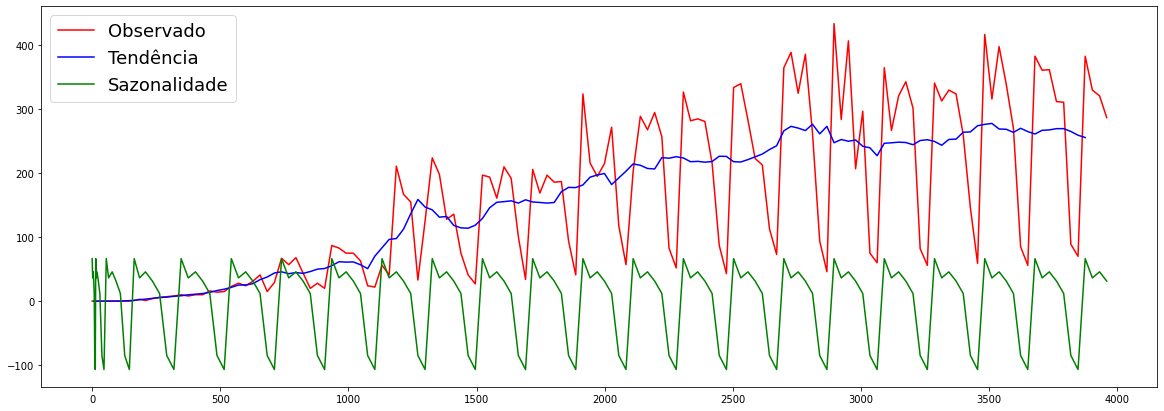

In [36]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

In [9]:
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)

In [10]:
resultados_rj = seasonal_decompose(df_rj.novosObitos, freq = 7)
resultados_mg = seasonal_decompose(df_mg.novosObitos, freq = 7)

In [29]:
resultados

In [ ]:
plotar(resultados.trend, resultados_rj.trend, resultados_mg.trend, 'red','blue','green',
       'SP','RJ','MG')

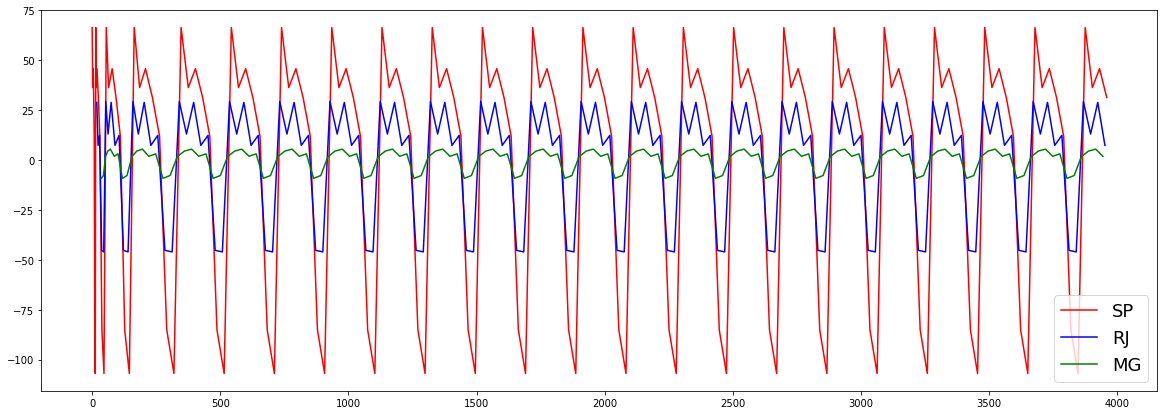

In [38]:
plotar(resultados.seasonal, resultados_rj.seasonal,resultados_mg.seasonal, 'red','blue','green',
      'SP','RJ','MG')

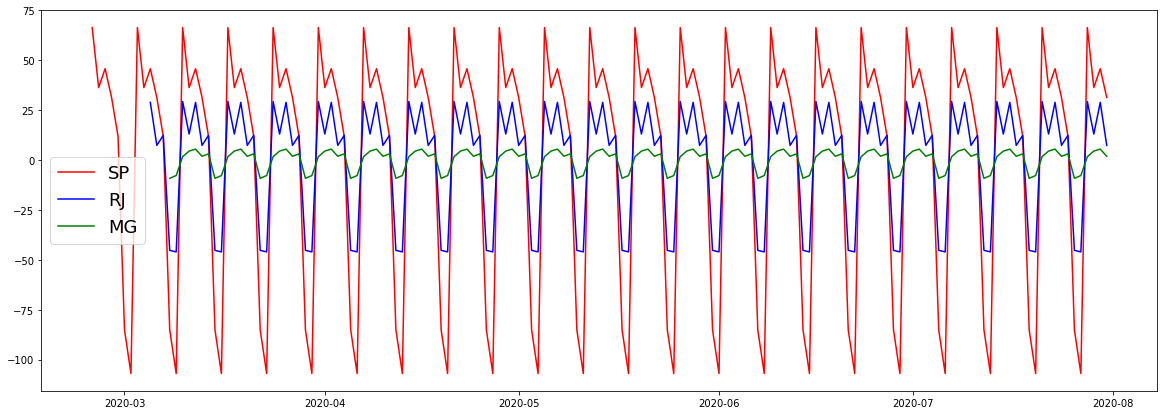

In [ ]:
plotar(resultados.seasonal, resultados_rj.seasonal,resultados_mg.seasonal, 'red','blue','green',
      'SP','RJ','MG')

In [39]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [40]:
# Função do stasmodel para fazer o teste ADF e testar se a série é estacionária ou não
from statsmodels.tsa.stattools import adfuller
adfuller(y.dropna())

(1.3664743612803403,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2627.7242380318335)

In [42]:
# Como esse valor do p-value é muito acima de 0.05, então a série não é estacionária
# Mas já tinhamos algumas caravteristicas de ser não estacionária, pois apresentava tendência, sazonalidade,
# e o aumento significativo do número de casos
# por tanto a média e a variância ao longo do tempo não será constante, pois está crescendo
print('p-valor:',adfuller(y.dropna())[1])

p-valor: 0.9969563888815705


In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [43]:
def plotarACF(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title='2ª Diferenciação')

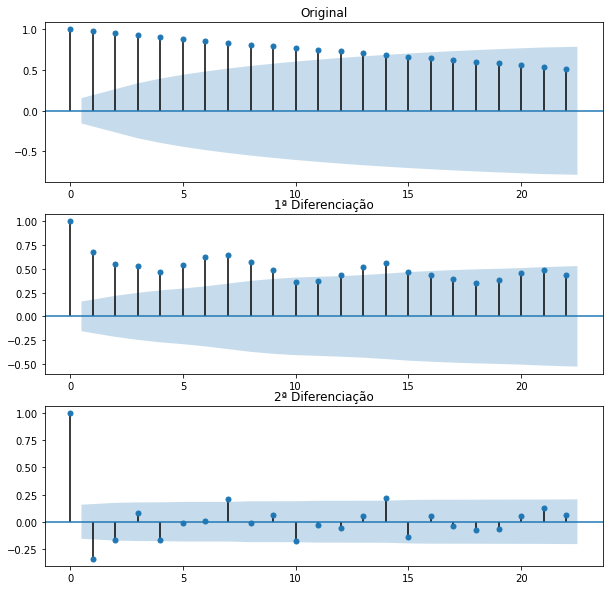

In [44]:
plotarACF(y,y.diff().dropna(),y.diff().diff().dropna())

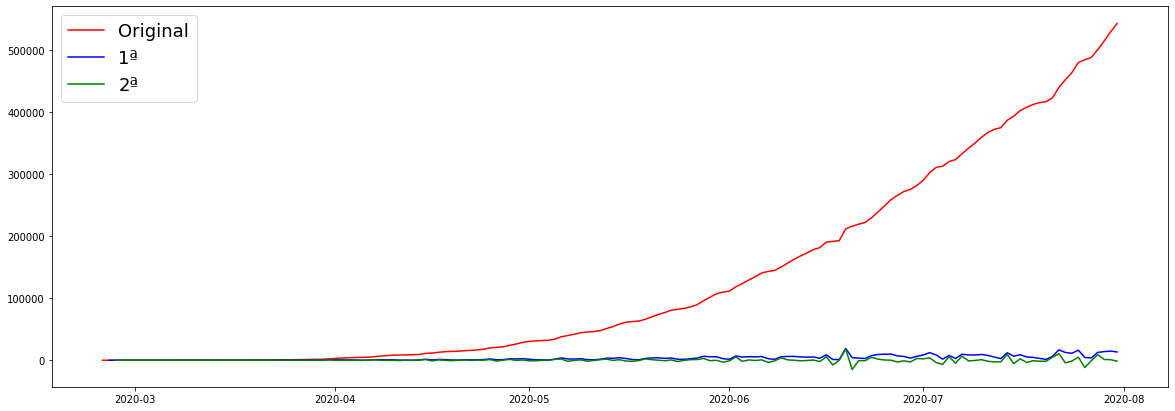

In [45]:
plotar(y,y.diff(),y.diff().diff(),'red','blue','green','Original','1ª','2ª')

Percebe-se que após a segunda diferencianção não houve muita mudança e talvez tenha ocorrido uma sobre-diferenciação que seria diseria diferenciar mais do que deveria

In [ ]:
# ARIMA é um acrônimo do auto regressivo, Ma, e I que é o grau de diferenciação

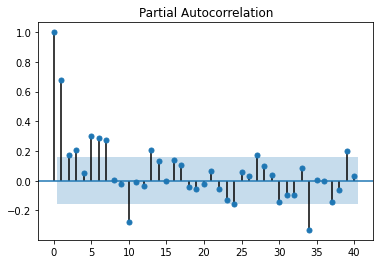

In [47]:
plot_pacf(y.diff().dropna(),lags=40);

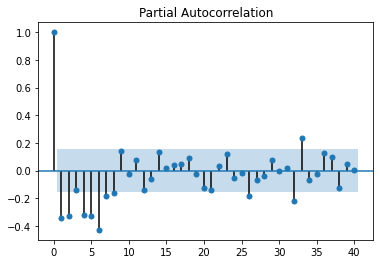

In [48]:
# Aqui mostra que estou manipulando demais o meu modelo, e isso pode gerar problemas no futuro
plot_pacf(y.diff().diff().dropna(),lags=40);

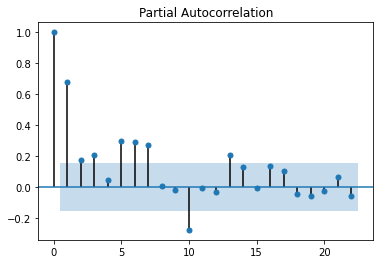

In [49]:
plot_pacf(y.diff().dropna());

## ARIMA (p = 1,d = 1,q = 1)

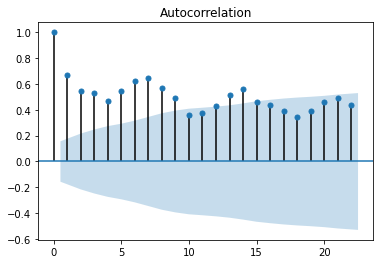

In [51]:
# Observa-se varios lags acima da significancia estatística
# O modelo ARIMA não é tão bom quando tem sazonalidade, que é o caso
# Por isso para resolver isso tem duas formas de resolver isso:
# Considerar p = 1 pra manter o modelo mais simples possível, já que adicionar mais
# complexidade não vai melhorar o modelo já que isso é o problema da sazonalidade 
# ou considerar a segunda diferenciação e lidar com a sbre diferenciação


plot_acf(y.diff().dropna());

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
# AIC é um acrônimo que significa critério de informação acaic, 
# é uma métrica de distância entre o resultado que obteve e o modelo 
# estatistico real, ou seja quanto menor do AIC melhor.

# BIC é o critério de informação Baysiano, estimativa de função de probailidade
# do seu modelo ser verdadeiro, quanto menor melhor.

# Porem se for muito baixo pode indicar um overfiting, ou seja 
# para novos dados não seria bom
modelo = ARIMA(y,order=(1,1,1))
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Casos   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1457.920
Method:                       css-mle   S.D. of innovations           2588.912
Date:                Fri, 21 Oct 2022   AIC                           2923.841
Time:                        15:18:54   BIC                           2936.066
Sample:                    02-26-2020   HQIC                          2928.806
                         - 07-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5283.8315   4478.757      1.180      0.238   -3494.370    1.41e+04
ar.L1.D.Casos     0.9967      0.005    217.406      0.000       0.988       1.006
ma.L1.D.Casos    -0.8462      0.040    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [54]:
import itertools 
p = d= q = range(0,2)
pdq = list(itertools.product(p, d, q))

In [55]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [56]:
print('Exemplo de combinação de parâmetros para o ARIMA Sazonal')
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o ARIMA Sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [57]:
y = df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [ ]:
import statsmodels.api as sm
aic_lista = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

In [ ]:
aic_lista

In [60]:
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1,1,1),
                               seasonal_order=(1,1,1,7))
results = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


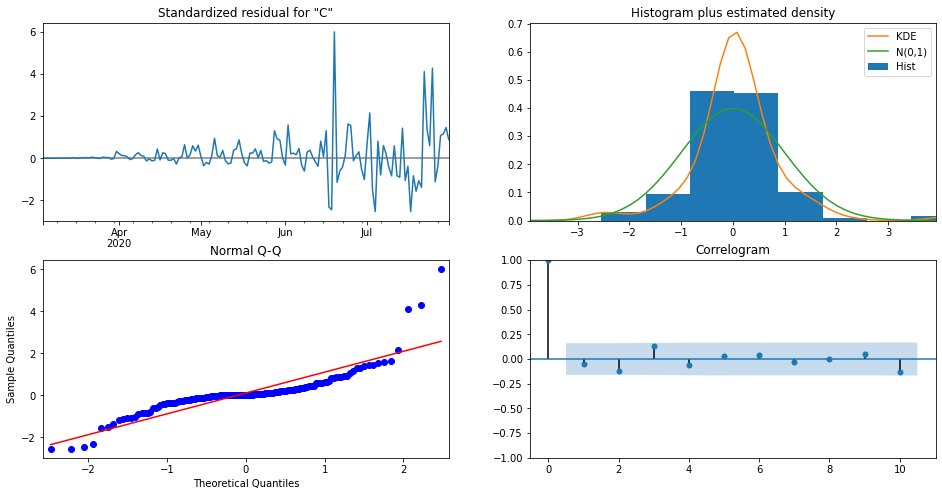

In [61]:
from tempfile import TemporaryFile
# graficos:
# 1 - Quantidade de resíduos em função da série temporal
# obs eque algumas datas específicas temos resíduos maiores

# 2 - Histograma distribuição normal que está em verde e o KDE
# que é a distribução dos resíduos o objetivo é se aproximar da normal, 
# o que quer dizer que os resíduos estão normalmente distríbuídos,
# não é o caso dessa série TemporaryFile

# 3 - Correlograma onde vemos as autocorrelações resíduais
# que bem baixas demonstrando que o modelo conseguiu transformar
# a série e, estacionário antes de fazer as previsões

# 4 - Q-Q Comparação entre quanatis

results.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ic = pred.conf_int()
pred_ic

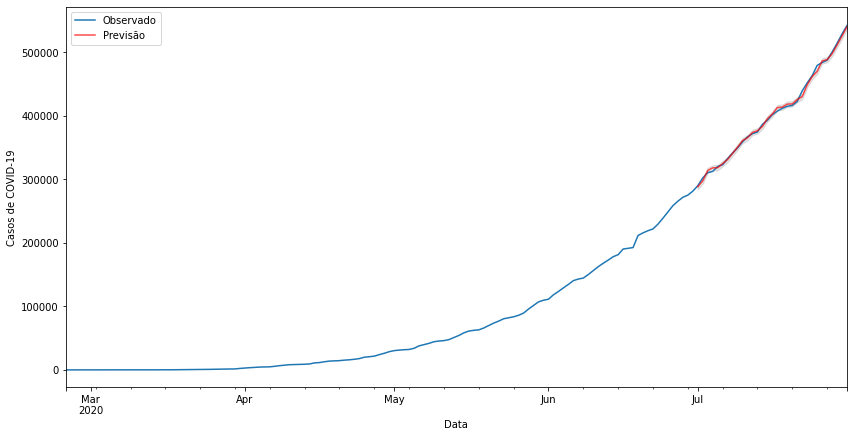

In [63]:
ax = y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

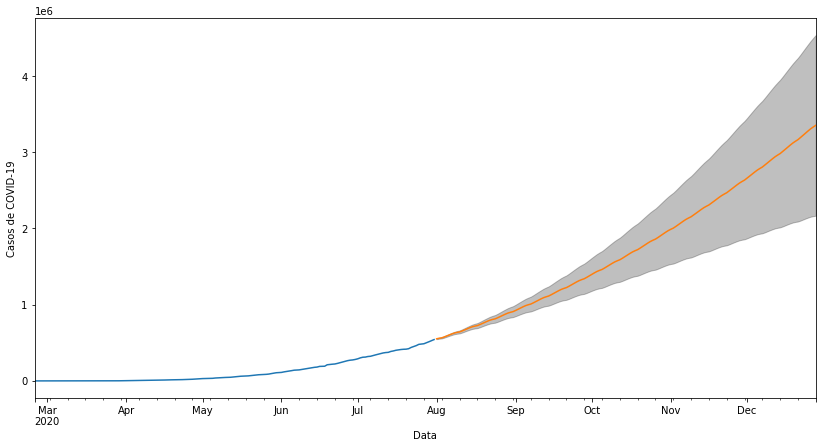

In [64]:
# steps é quantos dias vou querer prever
pred_uc = results.get_forecast(steps=150)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()

In [65]:
df_att = pd.read_csv('cases-brazil-states-att.csv')
df_att = df_att[df_att['state'] == 'SP']
df_att = df_att.rename(columns = {'date':'data'})
df_att.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [66]:
df_att['data'] = pd.to_datetime(df_att['data']).dt.date
df_att.index = df_att['data']
df_att.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


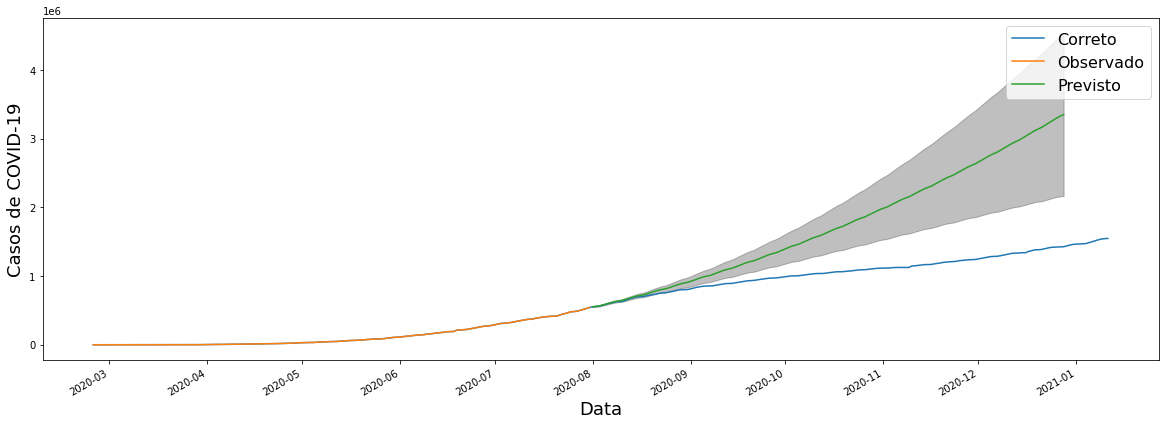

In [67]:
# Demonstra que as ações feitas em julho teve diferença, 
# pois se caso não tivesse continuaria tendo o aumento de mortes

x = df_att['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(x,label='Correto')
ax = y.plot(label='Observado')
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
# adicionar o intervalo de confiança
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1], color='k',alpha=0.25)
ax.set_xlabel('Data',fontsize=18)
ax.set_ylabel('Casos de COVID-19',fontsize=18)
plt.legend(fontsize=16)